In [15]:
import pandas as pd 
import altair as alt 
import numpy as np 
import seaborn as sns 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [14]:
alt.data_transformers.enable('vegafusion')

DataTransformerRegistry.enable('vegafusion')

# Iris Dataset
Model Selection and EDA

## Summary

T

## Introduction

## Methods and Results

First, let's load our data to a variable called `iris`.

In [4]:
iris = pd.read_csv('data/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Do we have any null values? Let's check.

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
len(iris)

150

150 non null values in each column, and a total of 150 rows. Therefore, no null values exist. Good.

Let's check the distribution of each class in the dataset.

In [13]:
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Each class has exactly 50 instances.

Before doing any more EDA, lets split our data into train and test.

In [43]:
iris_train, iris_test = train_test_split(iris, test_size=0.2, random_state=522)
iris_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
51,52,6.4,3.2,4.5,1.5,Iris-versicolor,1
123,124,6.3,2.7,4.9,1.8,Iris-virginica,2
73,74,6.1,2.8,4.7,1.2,Iris-versicolor,1
43,44,5.0,3.5,1.6,0.6,Iris-setosa,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2


Lets see what the spread looks like for each class

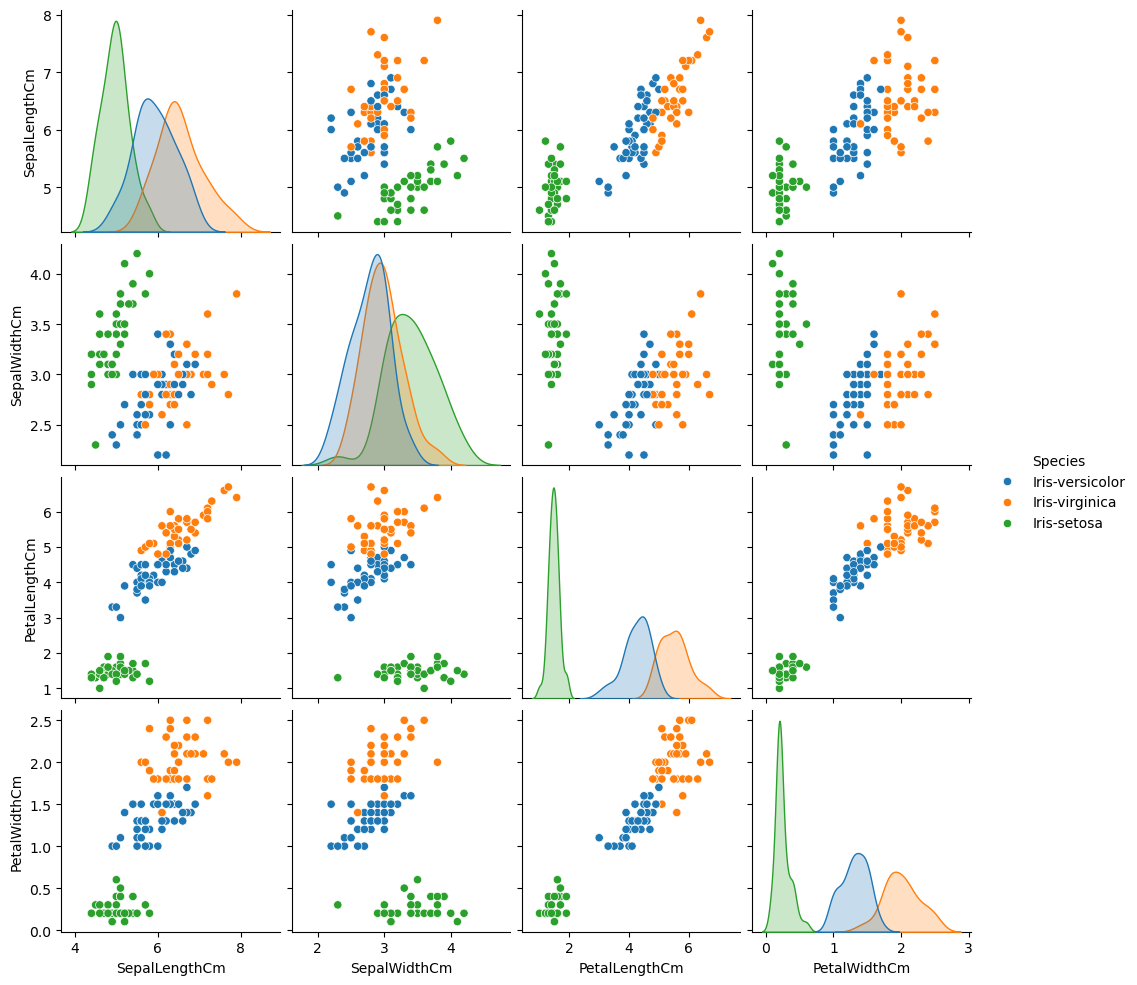

In [34]:
plt = sns.pairplot(iris_train.drop(columns =['Id'], axis=1), hue='Species')
plt

###### Code partially referenced from DSCI 571.

From the pairwise comparison chart above, we can see that `setosa` has the smallest petal width and length while `virginica` has the largest.

Is there a correlation between our features? Lets see.

<Axes: >

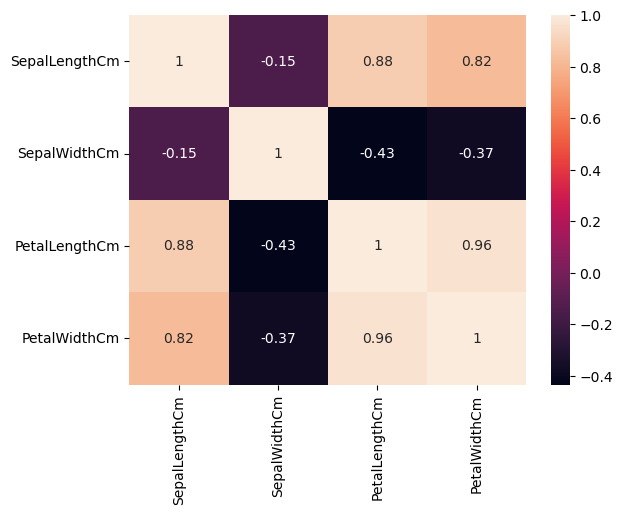

In [32]:
plt_corr = sns.heatmap(iris_train.drop(columns =['Id', 'Species'], axis=1).corr(), annot=True)
plt_corr

We see a strong correaltion between petal length and sepal length. As well, there is a strong correlation between `PetalWidthCm` and `PetalLengthCm`. This implies that the wider a petal is, the longer it also could be.

Lets see what the distribution of Petal Length looks like for each of our species

In [33]:
plt_ptlen = alt.Chart(
	iris_train, 
	title='Distribution of Petal Length by Flower Species'
).mark_bar(opacity=0.5).encode(
	x = alt.X('PetalWidthCm').bin(maxbins=50).sort('-y'),
	y = alt.Y('count()').title(None).scale(zero=False).stack(False),
	color = 'Species'
)
plt_ptlen

alt.Chart(...)

From the chart above, we can see that `Setosa` flower has the smallest petal size while `Virginica` is the largest. 

Lets fit a classification model to our data.

Lets first isolate our variables into X_train, X_test, y_train, and y_test. We also need to convert our classification variable to numeric instead of character.

In [47]:
X_train, X_test = iris_train.drop(columns=['Species', 'Id']), iris_test.drop(columns=['Species', 'Id'])
y_train, y_test = iris_train[['Species']], iris_test[['Species']]

y_train['Species']=y_train['Species'].map({'Iris-setosa': 0,'Iris-versicolor':1,'Iris-virginica':2})
y_test['Species']=y_test['Species'].map({'Iris-setosa': 0,'Iris-versicolor':1,'Iris-virginica':2})

y_test.head()

C:\Users\surya\AppData\Local\Temp\ipykernel_29748\1554765266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Species']=y_train['Species'].map({'Iris-setosa': 0,'Iris-versicolor':1,'Iris-virginica':2})
C:\Users\surya\AppData\Local\Temp\ipykernel_29748\1554765266.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Species']=y_test['Species'].map({'Iris-setosa': 0,'Iris-versicolor':1,'Iris-virginica':2})


,Species
86,1
135,2
119,2
118,2
127,2


Lets start with a `DummyClassifier` object.

In [ ]:
dummy = DummyClassifier()
dummy.

## Discussion

## References